In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [2]:
df=pd.read_csv('product a.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_a= df.drop(['Product Name','Product Category'],axis=1)

In [4]:
sales_a.shape

(60, 1)

In [5]:
sales_a.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [6]:
sales_a['Sales'].sum()

3213992

Text(0.5, 1.0, 'Product A')

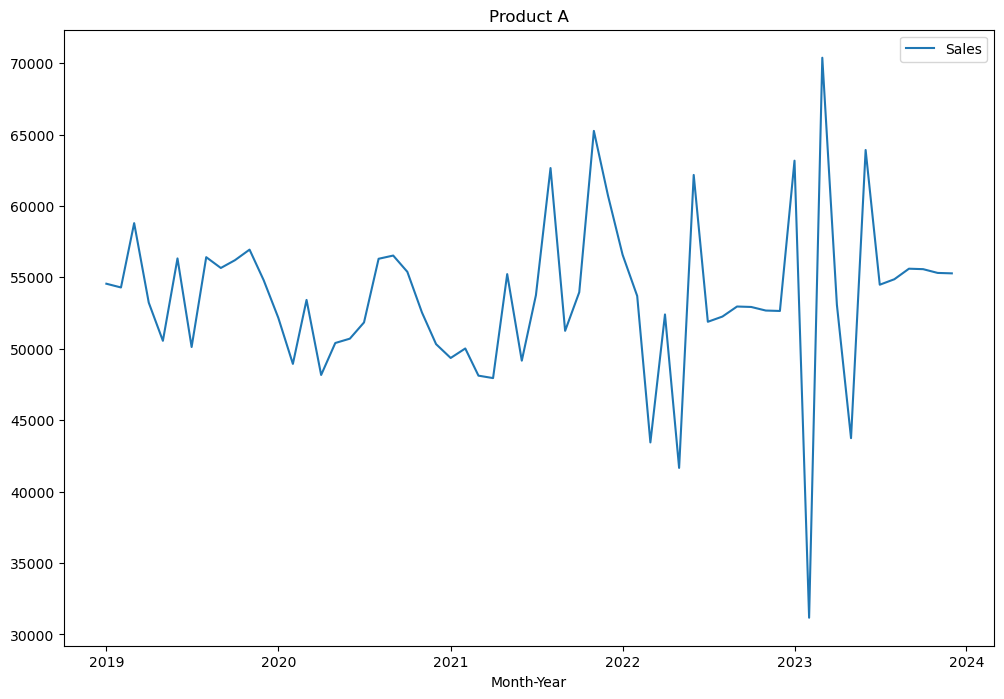

In [7]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_a)
plt.title('Product A')

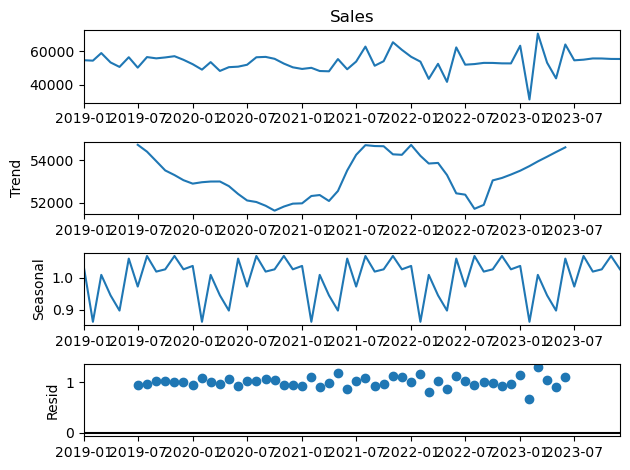

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_a['Sales'], model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()

In [9]:
train= sales_a[:48]
test=sales_a[48:]

In [10]:
len(train)

48

In [32]:
model=ExponentialSmoothing(train['Sales'],trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [33]:
pred=model.forecast(12)

In [34]:
pred

2023-01-01    49802.923340
2023-02-01    47823.284439
2023-03-01    45163.808223
2023-04-01    46228.572599
2023-05-01    45728.025465
2023-06-01    50541.243005
2023-07-01    47333.601684
2023-08-01    53667.036757
2023-09-01    49716.708587
2023-10-01    50449.274288
2023-11-01    53451.641855
2023-12-01    50335.416054
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product A')

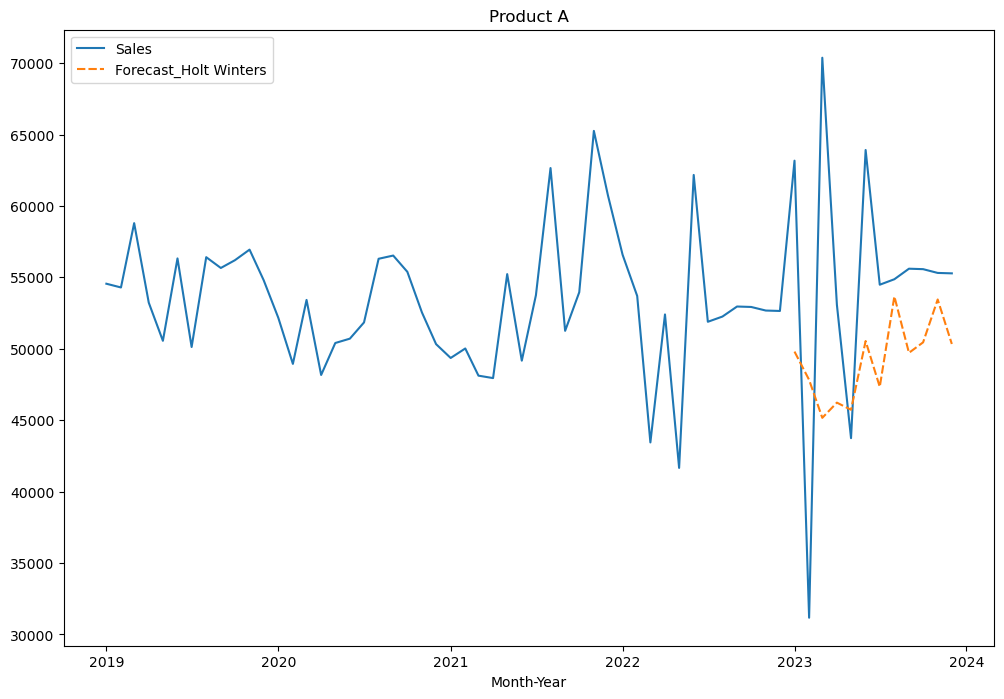

In [35]:
sales_a['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12, 8))
sns.lineplot(sales_a[['Sales','Forecast_Holt Winters']])
plt.title('Product A')

In [36]:
mae= mean_absolute_error(test['Sales'],pred)
mse=mean_squared_error(test['Sales'], pred)
mape= mean_absolute_percentage_error(test['Sales'],pred)
rmse= np.sqrt(mean_squared_error(test['Sales'], pred))

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')

MAE - Holt Winters: 8635.673625903184
MAPE - Holt Winters: 0.16353636612169323
MSE - Holt Winters: 121938286.08169018
RMSE - Holt Winters: 11042.56700598598


In [41]:
sales_b.tail(12)

,Sales,Forecast_Holt Winters
Month-Year,,
2023-01-01,514369,1.038792e+06
2023-02-01,1767039,1.359765e+06
2023-03-01,981026,1.462546e+06
2023-04-01,1589911,1.233030e+06
2023-05-01,692905,1.291109e+06
2023-06-01,1651940,1.116338e+06
2023-07-01,929333,1.190154e+06
2023-08-01,1690948,1.586225e+06
2023-09-01,1033615,1.215957e+06


# FORECASTING

In [37]:
model_forecast=ExponentialSmoothing(sales_a['Sales'],trend='add', seasonal='add', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [38]:
forecast_=model_forecast.forecast(12)

In [39]:
forecast_

2024-01-01    56184.533209
2024-02-01    46858.292147
2024-03-01    54823.650483
2024-04-01    51454.611189
2024-05-01    48902.756902
2024-06-01    57714.562171
2024-07-01    53069.839869
2024-08-01    58290.047988
2024-09-01    55669.734011
2024-10-01    56136.541339
2024-11-01    58509.462177
2024-12-01    56337.776793
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product A')

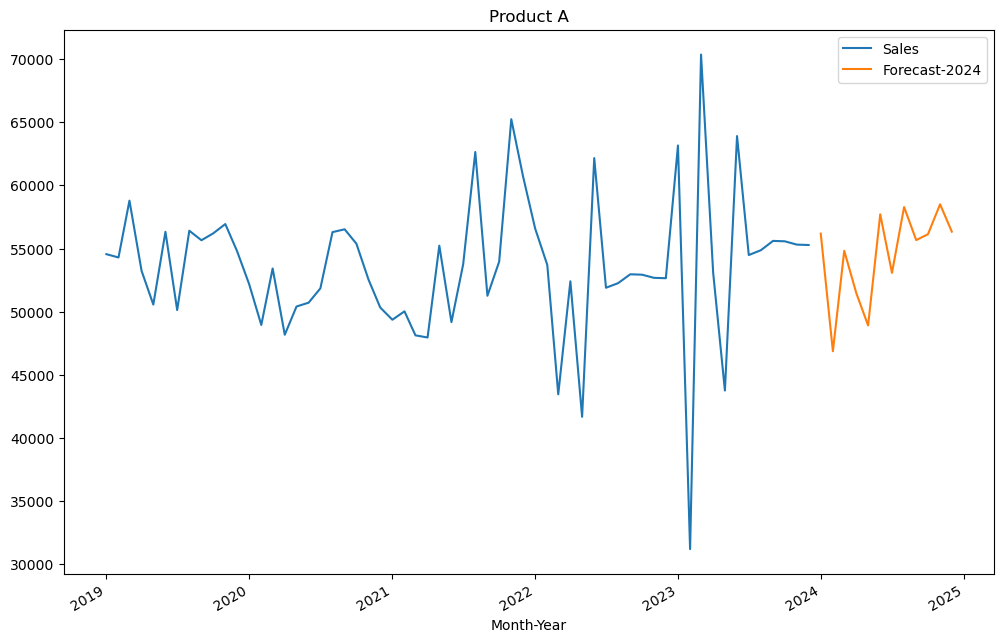

In [41]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_a[['Sales']])
forecast_.plot(legend=True, label='Forecast-2024')
plt.title('Product A')